# 📈 ASTP – Projeto Final
## Previsão de atrasos e cancelamentos de voos nos Estados Unidos, com base em fatores meteorológicos

### 👥 Grupo XX
- **Pedro Fonte Santa**, nº 105306  
- **Rafael Alexandre Dias Andorinha**, nº 131000  
- **Vasco Marques**, nº 87526

---

📅 **Data de entrega:** 19 de maio de 2025  

**Objetivo deste Notebook**: Este notebook tem como objetivo aplicar o **teste de Causalidade de Granger** para avaliar se **eventos meteorológicos** têm poder preditivo sobre os **atrasos** ou **cancelamentos de voos** nos EUA, entre 2018 e 2022.

Com base no dataset final tratado **causality-dataset-2018-2022_Final.csv**, composto por séries já estacionárias, serão analisadas diversas combinações de variáveis para detetar relações estatísticas causais com lags entre 1 e 15 dias.

---

### 🗂️ Datasets:
- [Previsão de estados de Voos (Kaggle)](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022/data?select=raw)  
- [Eventos Climáticos nos EUA (Kaggle)](https://www.kaggle.com/datasets/sobhanmoosavi/us-weather-events/data)

### Carregamento e Visualização Inicial dos Dados

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
from scipy.stats import zscore
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Carregar dataset final já com séries estacionárias
df = pd.read_csv("../../data/causality-dataset-2018-2022_Final.csv", parse_dates=['FlightDate'])
df.set_index('FlightDate', inplace=True)

# Verificar estrutura
print("Shape:", df.shape)
print("\nColunas:", df.columns.tolist())
df.head()

Shape: (1672, 7)

Colunas: ['Atrasos', 'Cancelamentos', 'Cold', 'Fog', 'Rain', 'Snow', 'Storm']


,Atrasos,Cancelamentos,Cold,Fog,Rain,Snow,Storm
FlightDate,,,,,,,
2018-01-02,-54.0,110,-22.0,684,-103.0,619,18
2018-01-03,-701.0,449,-323.0,543,332.0,1097,5
2018-01-04,-1533.0,3001,90.0,787,-137.0,1408,23
2018-01-05,1482.0,1007,109.0,844,138.0,923,16
2018-01-06,-827.0,234,106.0,828,-51.0,569,12


### 🔍 Verificação de Consistência dos Dados

In [3]:
# Garantir que não há NaNs
print(df.isna().sum())

# Garantir que todas as colunas são numéricas
print("\nTipos de dados:")
print(df.dtypes)

Atrasos          0
Cancelamentos    0
Cold             0
Fog              0
Rain             0
Snow             0
Storm            0
dtype: int64

Tipos de dados:
Atrasos          float64
Cancelamentos      int64
Cold             float64
Fog                int64
Rain             float64
Snow               int64
Storm              int64
dtype: object


### 🧪 Função para Aplicar Teste de Granger

In [5]:
def testar_granger(df, y, x_vars, maxlag=15):
    resultados = []
    
    for x in x_vars:
        print(f"\n=== {x} → {y} ===")
        dados = df[[y, x]].dropna()
        
        try:
            resultado = grangercausalitytests(dados, maxlag=maxlag, verbose=False)
            # Recolher menor p-valor
            min_p = min([resultado[lag][0]['ssr_ftest'][1] for lag in range(1, maxlag+1)])
            melhor_lag = min([(lag, resultado[lag][0]['ssr_ftest'][1]) for lag in range(1, maxlag+1)], key=lambda x: x[1])[0]
            resultados.append({'Variável X': x, 'Y': y, 'Melhor Lag': melhor_lag, 'Menor p-valor': round(min_p, 4)})
        except Exception as e:
            print(f"Erro com {x} → {y}: {e}")
            resultados.append({'Variável X': x, 'Y': y, 'Melhor Lag': None, 'Menor p-valor': None})
    
    return pd.DataFrame(resultados)

### 📊 Resultados: Causalidade sobre Atrasos

In [7]:
variaveis_clima = ['Cold', 'Fog', 'Rain', 'Snow', 'Storm']
resultado_atrasos = testar_granger(df, 'Atrasos', variaveis_clima)
resultado_atrasos


=== Cold → Atrasos ===

=== Fog → Atrasos ===

=== Rain → Atrasos ===

=== Snow → Atrasos ===

=== Storm → Atrasos ===


/Users/pedrofs/ISCTE/Mestrado/SeriesTemporais/astp-venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/pedrofs/ISCTE/Mestrado/SeriesTemporais/astp-venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/pedrofs/ISCTE/Mestrado/SeriesTemporais/astp-venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/pedrofs/ISCTE/Mestrado/SeriesTemporais/astp-venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/pedrofs/ISCTE/Mestrado/SeriesTemporais/astp-venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is

,Variável X,Y,Melhor Lag,Menor p-valor
0,Cold,Atrasos,4,0.0000
1,Fog,Atrasos,4,0.0000
2,Rain,Atrasos,3,0.0000
3,Snow,Atrasos,7,0.0000
4,Storm,Atrasos,5,0.1813


### 📊 Resultados: Causalidade sobre Cancelamentos

In [8]:
resultado_cancelamentos = testar_granger(df, 'Cancelamentos', variaveis_clima)
resultado_cancelamentos


=== Cold → Cancelamentos ===

=== Fog → Cancelamentos ===

=== Rain → Cancelamentos ===

=== Snow → Cancelamentos ===


/Users/pedrofs/ISCTE/Mestrado/SeriesTemporais/astp-venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/pedrofs/ISCTE/Mestrado/SeriesTemporais/astp-venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/pedrofs/ISCTE/Mestrado/SeriesTemporais/astp-venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/pedrofs/ISCTE/Mestrado/SeriesTemporais/astp-venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



=== Storm → Cancelamentos ===


/Users/pedrofs/ISCTE/Mestrado/SeriesTemporais/astp-venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


,Variável X,Y,Melhor Lag,Menor p-valor
0,Cold,Cancelamentos,15,0.0000
1,Fog,Cancelamentos,3,0.0000
2,Rain,Cancelamentos,5,0.0405
3,Snow,Cancelamentos,5,0.0189
4,Storm,Cancelamentos,3,0.0541


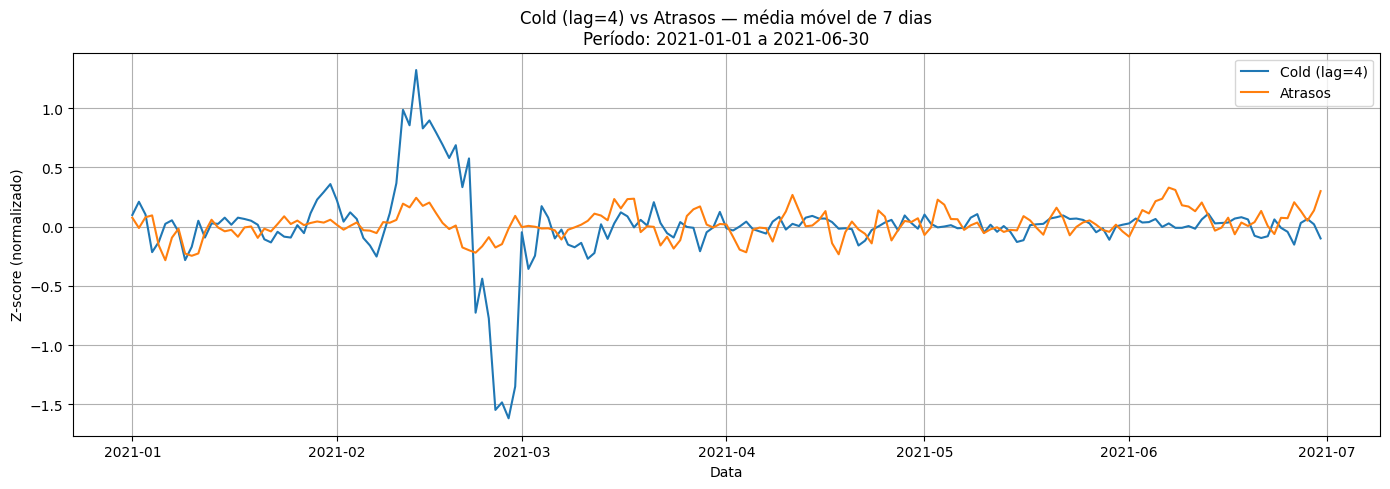

In [17]:
# Parâmetros
X = 'Cold'
Y = 'Atrasos'
lag = 4
window = 7  # média móvel
inicio = "2021-01-01"
fim = "2021-06-30"

# Séries com z-score e lag
serie_X = zscore(df[X].shift(lag).dropna())
serie_Y = zscore(df[Y].dropna())

# Alinhamento de datas
serie_X = pd.Series(serie_X, index=df.index[lag:])
serie_Y = pd.Series(serie_Y, index=df.index)

# Média móvel
serie_X_smooth = serie_X.rolling(window=window).mean()
serie_Y_smooth = serie_Y.rolling(window=window).mean()

# Cortar intervalo
df_plot = pd.DataFrame({
    f'{X} (lag={lag})': serie_X_smooth,
    f'{Y}': serie_Y_smooth
}).loc[inicio:fim].dropna()

# Plot
plt.figure(figsize=(14, 5))
plt.plot(df_plot, label=df_plot.columns)
plt.title(f'{X} (lag={lag}) vs {Y} — média móvel de {window} dias\nPeríodo: {inicio} a {fim}')
plt.xlabel('Data')
plt.ylabel('Z-score (normalizado)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

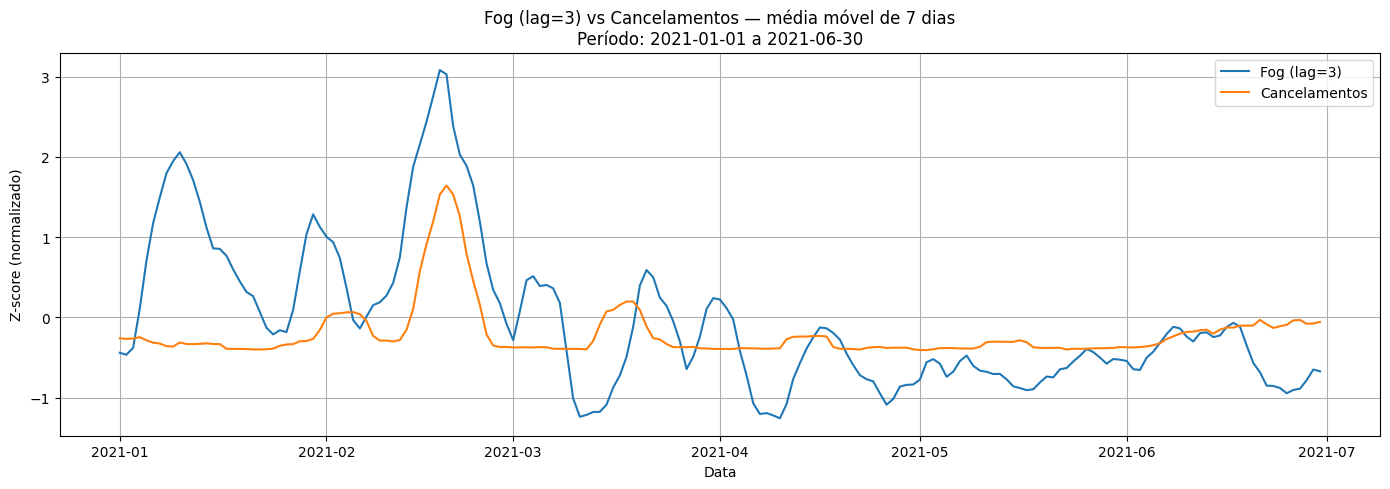

In [18]:
# Variáveis
X = 'Fog'
Y = 'Cancelamentos'
lag = 3
window = 7
inicio = "2021-01-01"
fim = "2021-06-30"

# Criar z-score com lag
serie_X = zscore(df[X].shift(lag).dropna())
serie_Y = zscore(df[Y].dropna())

# Reindexar para alinhar datas corretamente
serie_X = pd.Series(serie_X, index=df.index[lag:])
serie_Y = pd.Series(serie_Y, index=df.index)

# Média móvel
serie_X_smooth = serie_X.rolling(window=window).mean()
serie_Y_smooth = serie_Y.rolling(window=window).mean()

# Cortar intervalo
df_plot = pd.DataFrame({
    f'{X} (lag={lag})': serie_X_smooth,
    f'{Y}': serie_Y_smooth
}).loc[inicio:fim].dropna()

# Plot
plt.figure(figsize=(14, 5))
plt.plot(df_plot, label=df_plot.columns)
plt.title(f'{X} (lag={lag}) vs {Y} — média móvel de {window} dias\nPeríodo: {inicio} a {fim}')
plt.xlabel('Data')
plt.ylabel('Z-score (normalizado)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔁 Análise de Causalidade de Granger

A última etapa do projeto consistiu em explorar a existência de **relações causais entre variáveis meteorológicas e as séries de atrasos e cancelamentos de voos**, com base no **teste de causalidade de Granger**.

Todas as séries utilizadas foram previamente transformadas para garantir estacionariedade, de forma a respeitar os pressupostos do teste. A análise foi feita com lags até 15 dias e avaliou se o histórico de uma variável meteorológica melhora significativamente a previsão da variável de interesse (`Atrasos` ou `Cancelamentos`).

---

### 📊 Tabelas de p-valores

Os resultados foram sintetizados em duas tabelas, uma para cada variável dependente. Para cada variável climática, foi registado o **menor p-valor encontrado nos diferentes lags**, bem como o **lag ótimo** onde essa significância foi observada.

#### ✈️ Atrasos:

- **Cold**, **Fog**, **Rain** e **Snow** apresentaram p-values extremamente baixos (p < 0.001), indicando **forte evidência estatística de Granger-causalidade**.
- Os melhores lags variaram entre 3 e 7 dias, sugerindo um **efeito antecipado** dos eventos meteorológicos na operação aérea.
- A variável **Storm** não mostrou evidência estatística significativa (p > 0.05), o que pode ser explicado pela sua **baixa frequência**, impacto mais **imediato** (não distribuído em lags), ou sobreposição com outras variáveis já incluídas no modelo (como `Rain` ou `Snow`).

#### 🛑 Cancelamentos:

- Mais uma vez, **Cold**, **Fog**, **Rain** e **Snow** apresentaram evidência clara de causalidade, com destaque para `Cold`, que teve impacto significativo com um **lag de 15 dias** — refletindo o efeito prolongado do frio extremo em decisões operacionais.
- A variável `Storm` apresentou p-valor de 0.0541 — **muito próximo** do limiar de significância, mas ainda assim considerado não significativo num contexto estatístico conservador.

conclusão desta parte:

Embora à partida a variável `Cold` (temperaturas extremamente baixas) não pareça ser diretamente responsável por atrasos ou cancelamentos, a análise mostra que ela possui forte poder preditivo.

Este efeito pode ser explicado por:
- Processos operacionais mais lentos em temperaturas extremas (ex: de-icing, manutenção)
- Possível sobreposição com outros fenómenos meteorológicos (ex: `Snow`, `Fog`)
- Impacto indireto acumulado ao longo dos dias, refletido no lag mais elevado observado nos cancelamentos

Assim, `Cold` pode atuar como um **indicador antecipado de condições adversas mais complexas**, justificando a sua relevância estatística mesmo que não seja, por si só, a causa imediata de perturbações nos voos.

---

### 📈 Visualizações Temporais

Para reforçar a interpretação dos resultados estatísticos, foram gerados gráficos que comparam visualmente as séries causadoras com as séries dependentes, aplicando:

- **Deslocamento temporal (lag)** com base nos resultados do Granger
- **Normalização por z-score** para permitir comparação em escala
- **Média móvel de 7 dias** para suavizar variações diárias
- **Foco em intervalos representativos** (ex: Jan–Jun 2021)

Esses gráficos mostraram, por exemplo, que picos de `Cold` antecedem aumentos em `Atrasos` com lag de 4 dias, e que aumentos em `Fog` precedem elevações em `Cancelamentos`, ambos em linha com os resultados estatísticos.

---

### ✅ Conclusão Final

Os testes realizados confirmam que **eventos meteorológicos têm efeito preditivo sobre os atrasos e cancelamentos de voos**, com lags curtos e estatisticamente significativos. As variáveis `Cold`, `Rain`, `Fog` e `Snow` provaram ser **variáveis exógenas relevantes** que podem — e devem — ser consideradas em modelos preditivos mais avançados ou sistemas de apoio à decisão no setor aéreo.

Esta análise complementa o trabalho anterior e representa a componente "Ir mais além" do projeto, integrando dados externos com valor analítico real.

Nota: nesta análise, não foi considerada a dimensão geográfica dos fenómenos meteorológicos, tendo-se utilizado o total nacional de eventos por tipo. Embora a utilização de localização (ex: por aeroporto) pudesse aumentar a precisão da análise, esta abordagem agregada é válida para captar padrões gerais e consistentes entre clima e operação aérea a nível macro. Esta simplificação foi adotada de forma consciente, de modo a manter o foco na relação temporal e na metodologia de causalidade. No futuro uma clara melhoria nesta fase seria obviamente cosiderar a localização dos fenomenos meterologicos e dos voos.